<a href="https://colab.research.google.com/github/hamiin47/OB-session/blob/main/Assign_0516.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **5.1 합성곱 신경망**


합성곱 신경망은 이미지 전체를 한 번에 계산하는 것이 아닌 이미지의 국소적 부분을 계산함으로써 시간과 자원을 절약하여 이미지의 세밀한 부분까지 분석할 수 있는 신경망이다.

**5.1.1 합성곱층의 필요성**

합성곱 신경망은 이미지나 영상을 처리하는데 유용하다.

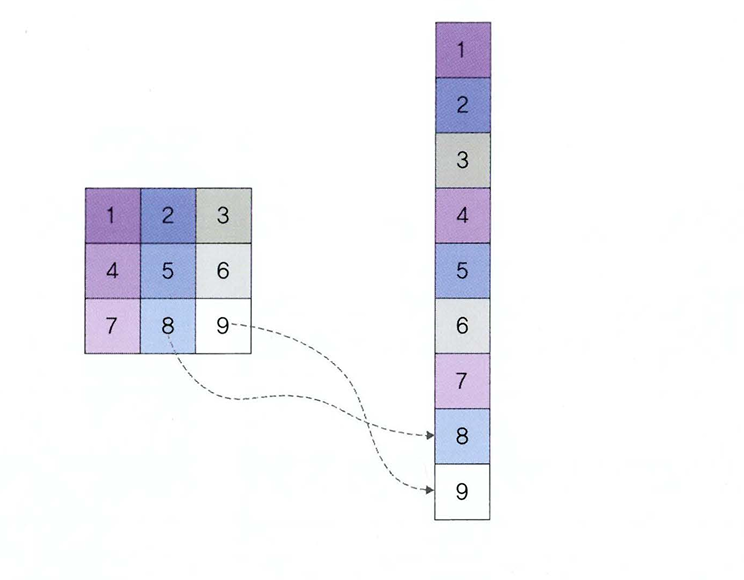

이미지 분석은 왼쪽과 같은 3X3 배열을 오른쪽과 같이 펼쳐서 각 픽셀에 가중치를 곱하여 은닉층으로 전달하게 되는데 이 과정에서 데이터의 공간적 구조를 무시하게 된다.-> 이것을 방지하기 위해 도입된 것이 합성곱층이다.

**5.1.2 합성곱 신경망 구조**
- 합성곱 신경망은 음성 인식이나 이미지/영상 인식에서 주로 사용되는 신경망이다.
- 다차원 배열 데이터를 처리하도록 구성되어 컬러 이미지 같은 다차원 배열 처리에 특화되어 있으며, 입력층/합성곱층/풀링층/완전연결층/출력층 으로 구성된다.

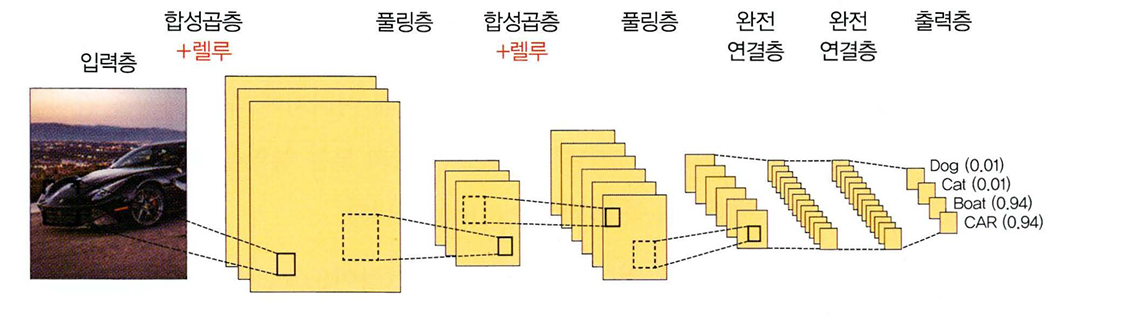

- 합성곱층과 풀링층을 거치면서 입력 이미지의 주요 특성 벡터 추출 -> 추출된 주요 특성 벡터들은 완전연결층을 거치면서 1차원 벡터로 변환 -> 출력층에서 활성화 함수인 소프트맥스 함수를 사용하여 최종 결과 출력

***입력층***
- 이미지 데이터가 최초로 거치게 되는 계층이다.
- 이미지는 높이, 너비, 채널의 값을 갖는 3차원 데이터이다.

ex. 다음 그림은 높이 4, 너비 4, 채널은 RGB를 갖고 있으므로 이미지 형태는 (4,4,3)으로 표현할 수 있다.

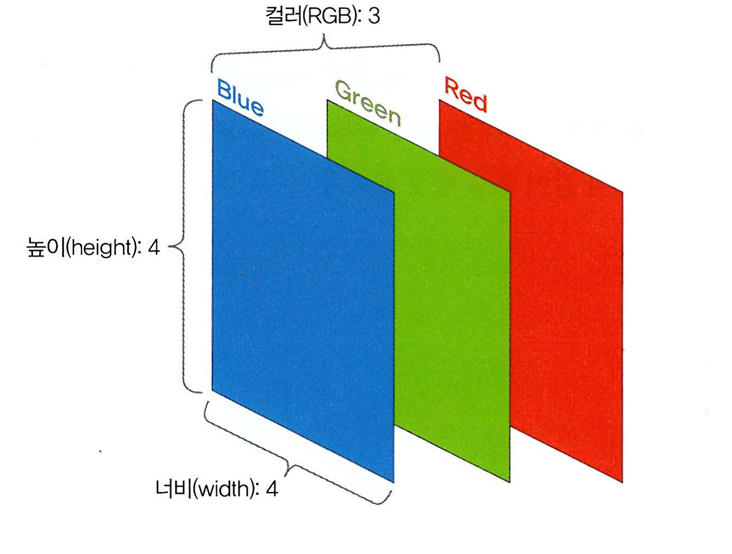

***합성곱층***
- 입력 데이터에서 특성을 추출하는 역할을 수행한다.
  - 입력 이미지가 들어왔을 때 이미지에 대한 특성을 감지하기 위해 커널이나 필터를 사용한다.
  - 커널/필터는 이미지의 모든 영역을 훑으면서 특성을 추출하게 되는데, 이렇게 추출된 결과물이 특성 맵이다.
- 다음은 스트라이드가 1일 때 이동하는 과정이다.

1단계. 입력 이미지에 3X3 필터 적용
- 입력 이미지와 필터를 포개 놓고 대응되는 숫자끼리 곱한 후 모두 더한다.

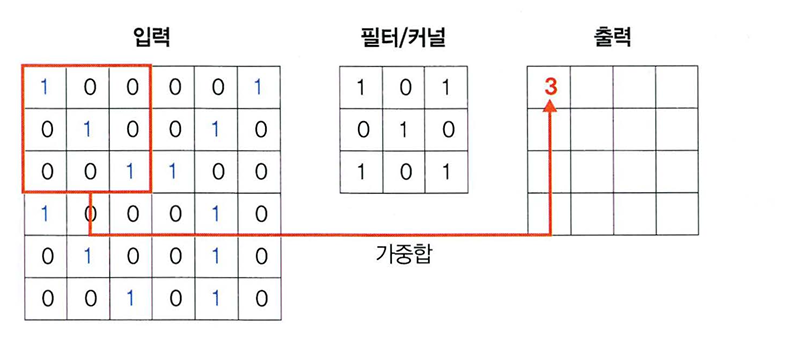

2단계, 필터가 1만큼 이동

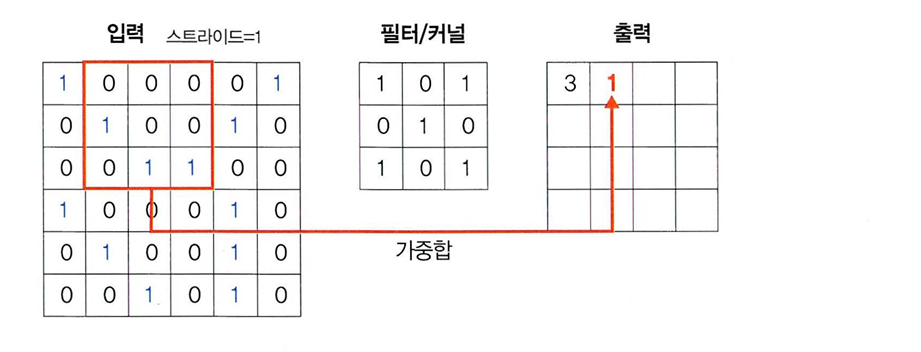

3단계. 필터가 1만큼 두 번째 이동

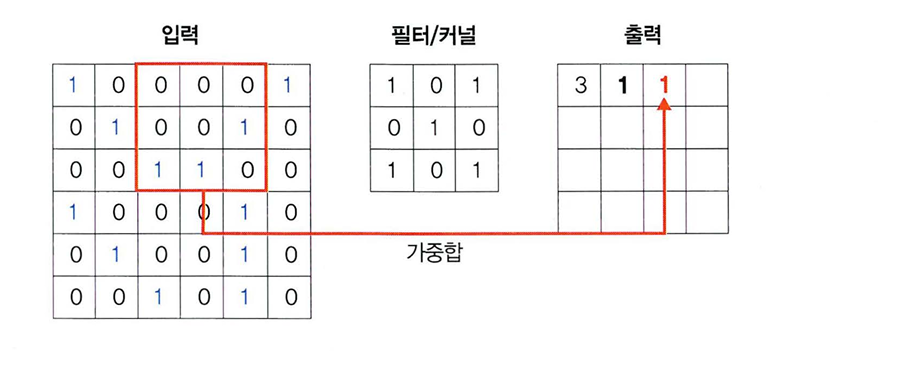

4단계. 필터가 1만큼 세 번째 이동

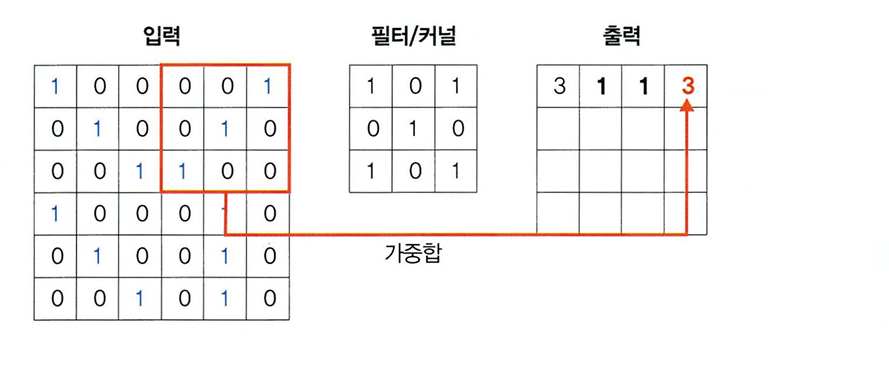

5단계. 필터가 1만큼 네 번째 이동

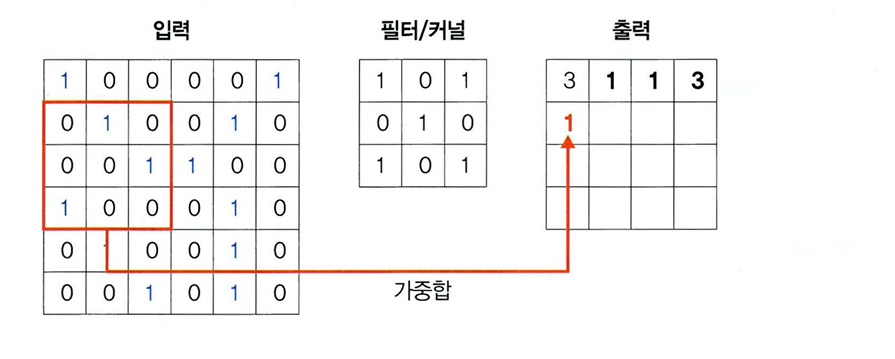

6단계. 필터가 1만큼 마지막으로 이동

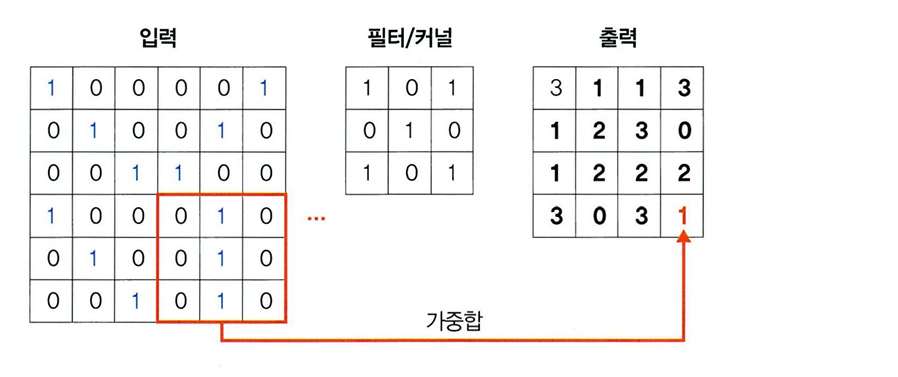

위의 과정은 그레이스케일에 대한 이미지 확인이고 이제 컬러 이미지의 합성곱을 알아보겠습니다.

- 그레이스케일 이미지와 구분되는 특징은  필터 채널이 3이라는 것과 RGB 각각에 서로 다른 가중치로 합성곱을 적용한 후 결과를 더해 준다는 것이다.
- 그 외 스트라이드 및 연산하는 방법은 동일하다

** 이때 필터 채널이 3이라고 해서 필터 개수도 세 개라고 오해하기 쉬운데, 실제로는 필터 개수가 한 개라는 점에 주의해야한다.

<컬러 이미지 합성곱>

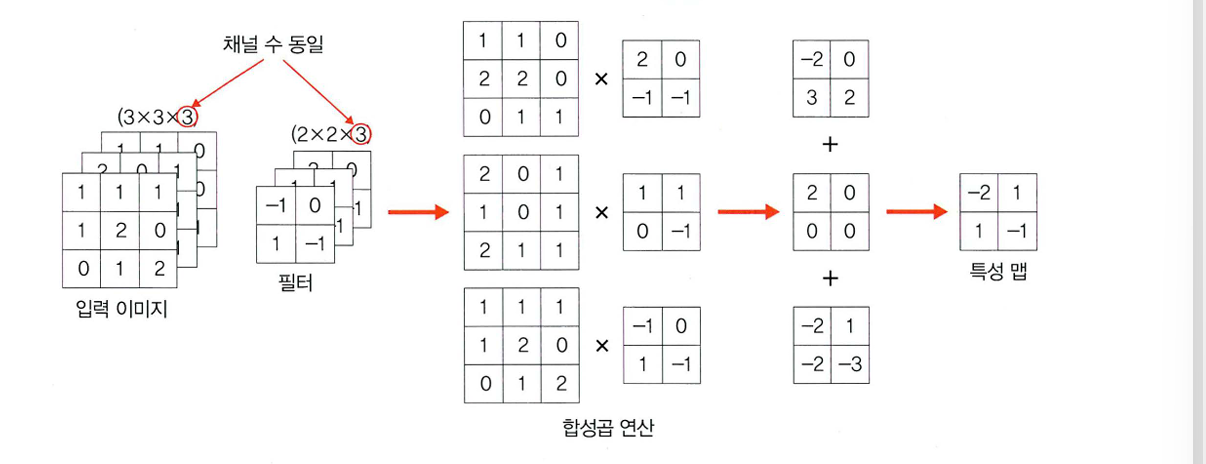

<필터가 2 이상인 합성곱>

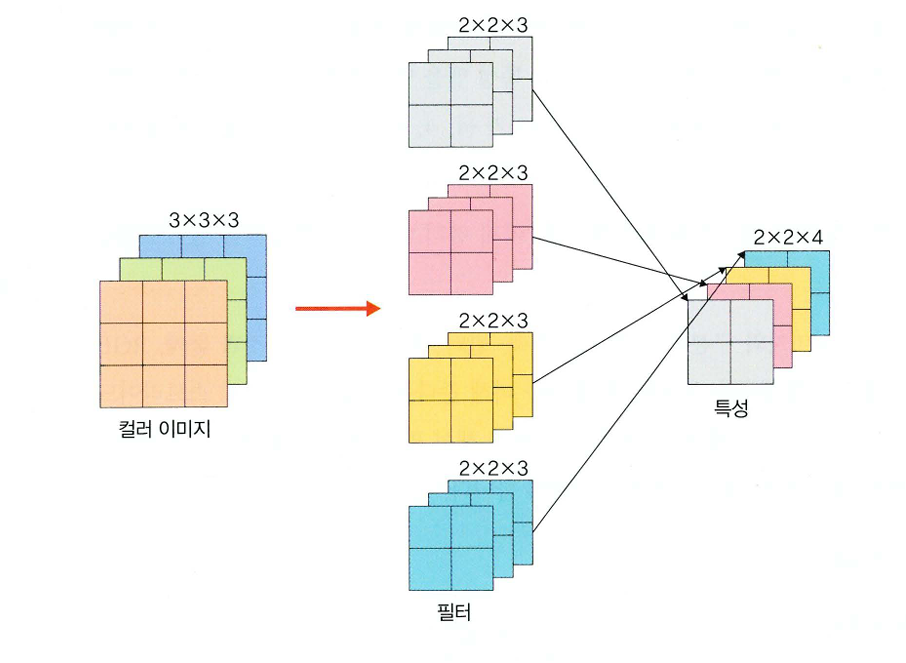

- 합성곱층을 요약하면 다음과 같다.

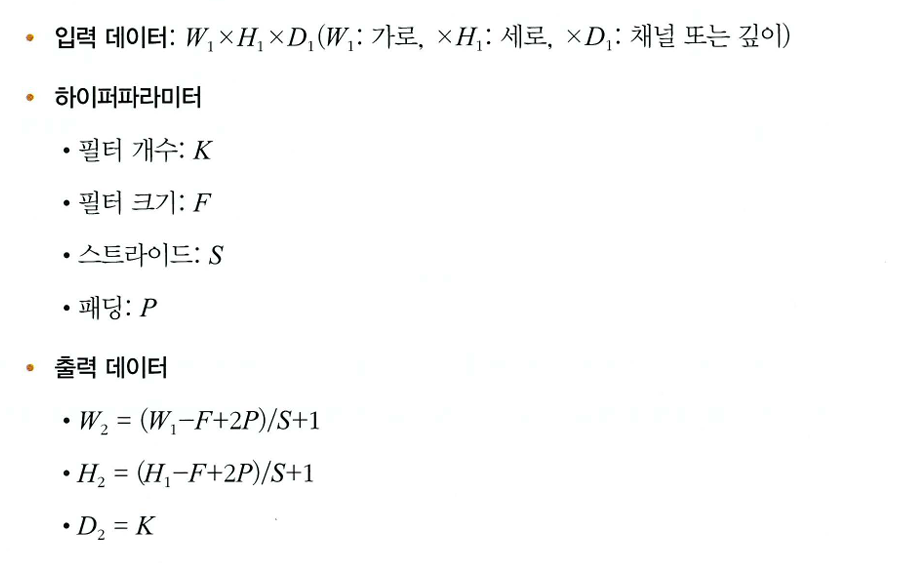

***풀링층***
- 풀링층은 합성곱층과 유사하게 특성 맵의 차원을 다운 샘플링하여 연산량을 감소시키고, 주요한 특성 벡터를 추출하여 학습을 효과적으로 할 수 있게 한다.
- 풀링 연산은 최대 풀링과 평균 풀링이 있다.
  - 최대 풀링 : 대상 영역에서 최댓값을 추출
  - 평균 풀링 : 대상 영역에서 평균을 반환

첫 번째 최대 풀링 과정 : 최댓값인 3 선택

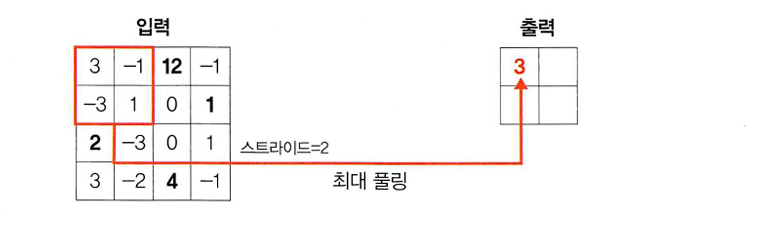

두 분째 최대 풀링 과정 : 최댓값인 12 선택

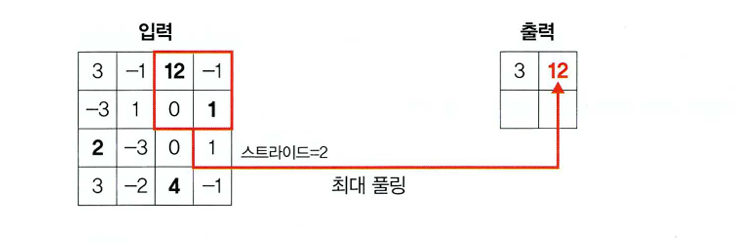

세 번째 최대 풀링 과정 : 최댓값인 3 선택

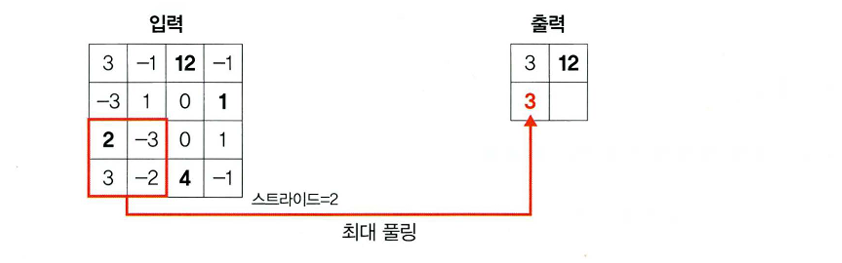

네 번째 최대 풀링 과정 : 최댓값인 4 선택

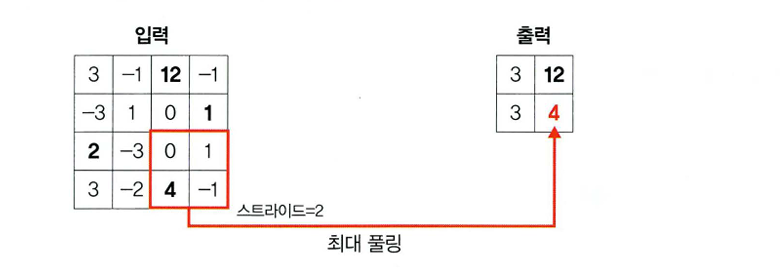

<최대 풀링과 평균 풀링 결과 비교>

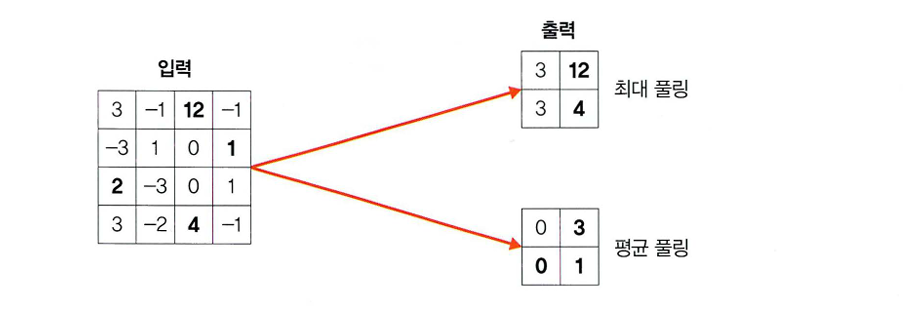

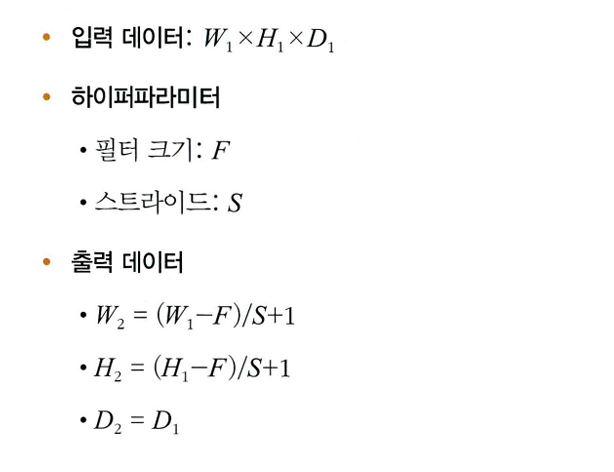


---




***완전연결층***
- 합성곱층과 풀링층을 거치면서 차원이 축소된 특성 맵은 최종적으로 완전 연결층으로 전달되며 이 과정에서 3차원 벡터에서 1차원 벡터로 펼처지게 된다.

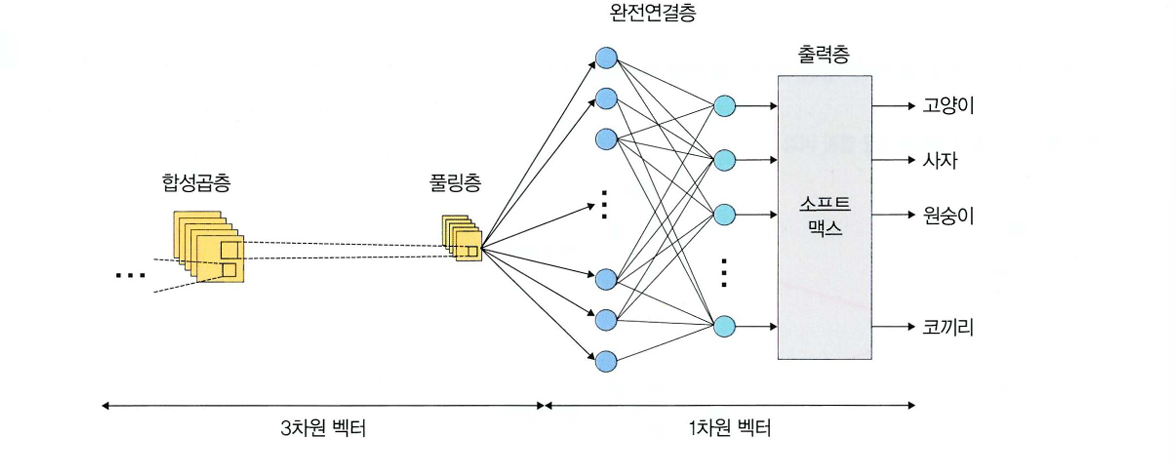

***출력층***
- 출력층에서는 소프트맥스 활성화 함수가 사용되는데, 입력받은 값을 0~1 사이의 값으로 출력한다.
- 따라서, 마지막 출력층의 소프트맥스 함수를 사용하여 이미지가 각 레이블에 속할 확률 값을 출력하며 가장 높은 확률 값을 갖는 레이블이 최종 값으로 선정된다.


---



**5.1.3 1D, 2D, 3D 합성곱**

***1D 합성곱***
- 1D 합성곱은 필터가 시간을 축으로 좌우로만 이동할 수 있는 합성곱이다.
- 따라서, 입력(W)과 필터(k)에 대한 출력은 W가 된다.

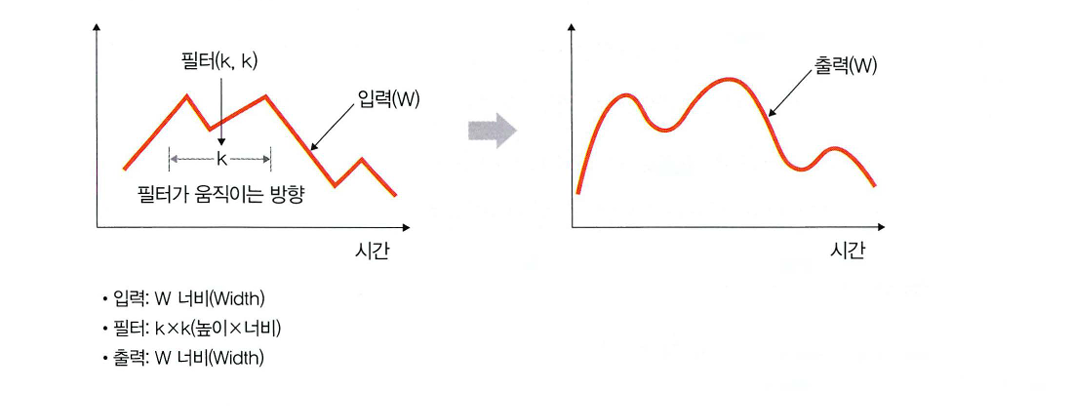

***2D 합성곱***
- 2D 합성곱은 필터가 다음 그림과 같이 방향 두 개로 움직이는 형태이다.
- 즉, 입력(W,H)과 필터(k,k)에 대한 출력은 (W,H)가 되며, 출력 형태는 2D 행렬이 된다.

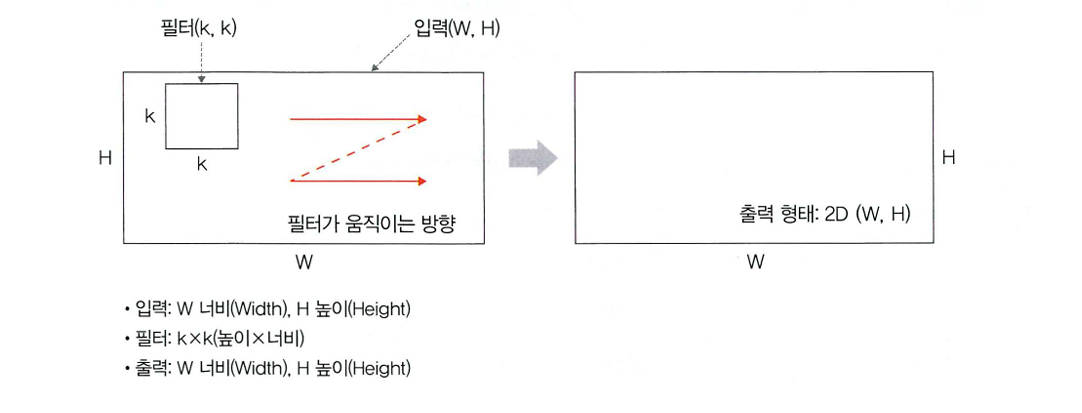

***3D 합성곱***
- 3D 합성곱은 필터가 움직이는 방향은 3개가 있다.
- 입력(W,H,L)에 대해 필터(k,k,d)를 적용하면 출력으로 (W,H,L)을 갖는 형태가 3D 합성곱이다.

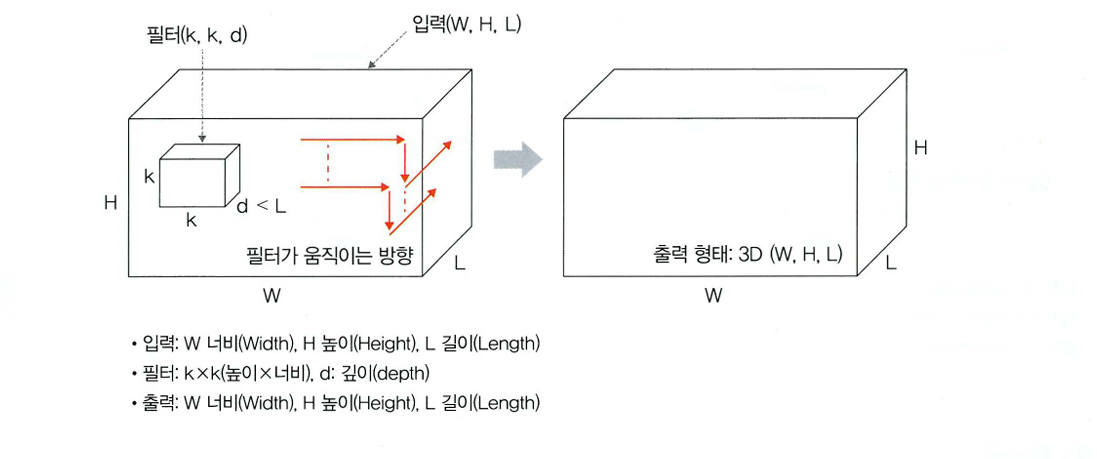

***3D 입력을 갖는 2D 합성곱***
- 입력이 3D 형태임에도 출력 형태가 3D가 아닌 2D 행렬을 취하는 것이 '3D 입력을 갖는 2D 합성곱'이다.

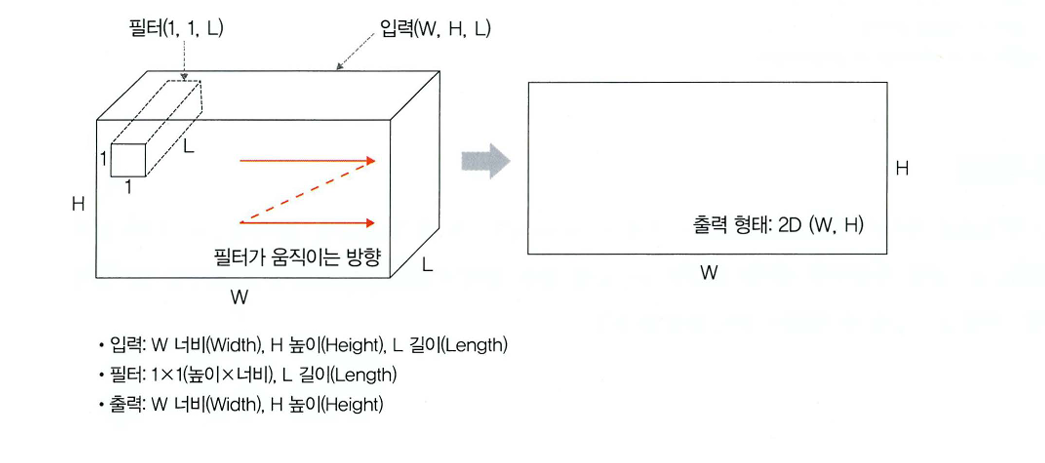

***1X1 합성곱***
- 3D 형태로 입력되며, 입력(W,H,L)에 필터(1,1,1)을 적용하면 출력은 (W,H)가 된다.

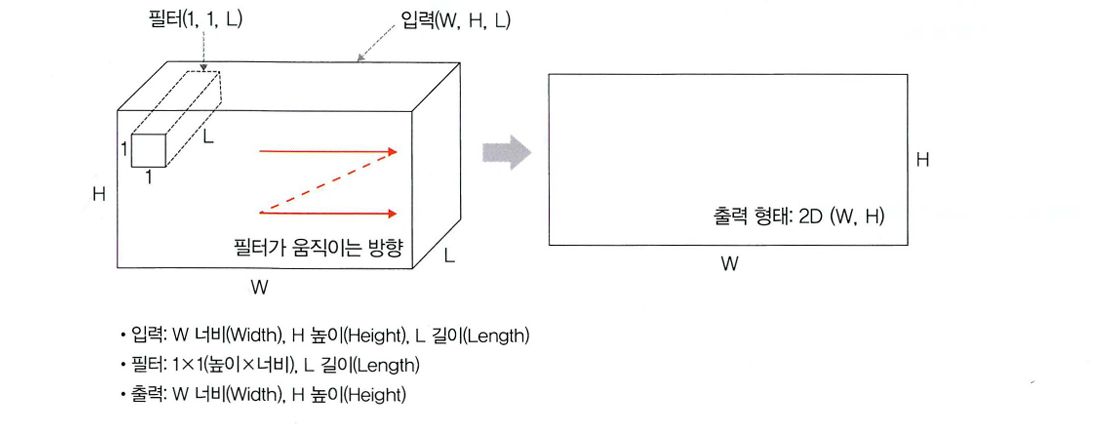